In [6]:
import multiprocessing

import matplotlib.pyplot as plt
import numpy as np

import simulation_util
%matplotlib inline  

In [2]:
radius = 10 
temperature = 1200
species = "Fe"

n_samples = 2
seed = 2023

simulation_util.equilibrate_particle(radius, temperature, "Fe")
atom_positions, atom_velocities = simulation_util.generate_simulation_parameters(
    radius, temperature, n_samples, seed
)

parameter_tuples = [
    (atom_positions[i], atom_velocities[i], 0, i) for i in range(n_samples)
]

In [3]:
# run LAMMPS simulations on the equilibriated NP with randomly sampled velocity of the incoming atom
with multiprocessing.Pool() as pool:
    pool.starmap(simulation_util.simulate_collision, parameter_tuples)

In [8]:

for i in range(n_samples):
    data = np.loadtxt(f"pe_{i}.dat")
    if data[-1,-1] > -1.0e-3:
        print(i)
        plt.plot(data[:,0], data[:,1])

# plt.show()

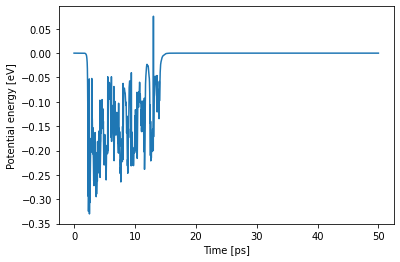

In [14]:
data = np.loadtxt("results/results_R10_epsilon0.1086/pe.dat")
plt.plot(1e-3*(data[:,0]-100000), data[:,1])
plt.xlabel("Time [ps]")
plt.ylabel("Potential energy of Ar [eV]")
plt.show()
